<a href="https://colab.research.google.com/github/Mr-Himanshu123/ML_Project-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**Project Name**    - **NYC Taxi Trip Time Prediction**</font>



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -**   Himanshu Rathod


<img src='https://media.tenor.com/Ugjpo2Td2g4AAAAM/taxi-verona-padova.gif' align='centre'/>

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import missingno as msno

#library used to calculate distance from geographical coordinates
from geopy.distance import great_circle

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
nyc_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter Projects/ML(1)-TAxi time prediction/Data & Resources/NYC Taxi Data.csv')

### Dataset First View

In [4]:
# Dataset First Look
nyc_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
row_count=len(nyc_data.index)
column_count=len(nyc_data.columns)
print(f'No. of rows={row_count}')
print(f'No. of columns={column_count}')

#Also we can count in tuple using function
print('\n')
nyc_data.shape

No. of rows=1458644
No. of columns=11




(1458644, 11)

### Dataset Information

In [6]:
# Dataset Info
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_value_count=nyc_data.duplicated().sum()
duplicate_value_count

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_value_count=nyc_data.isnull().sum()
missing_value_count

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: >

<Figure size 2000x2000 with 0 Axes>

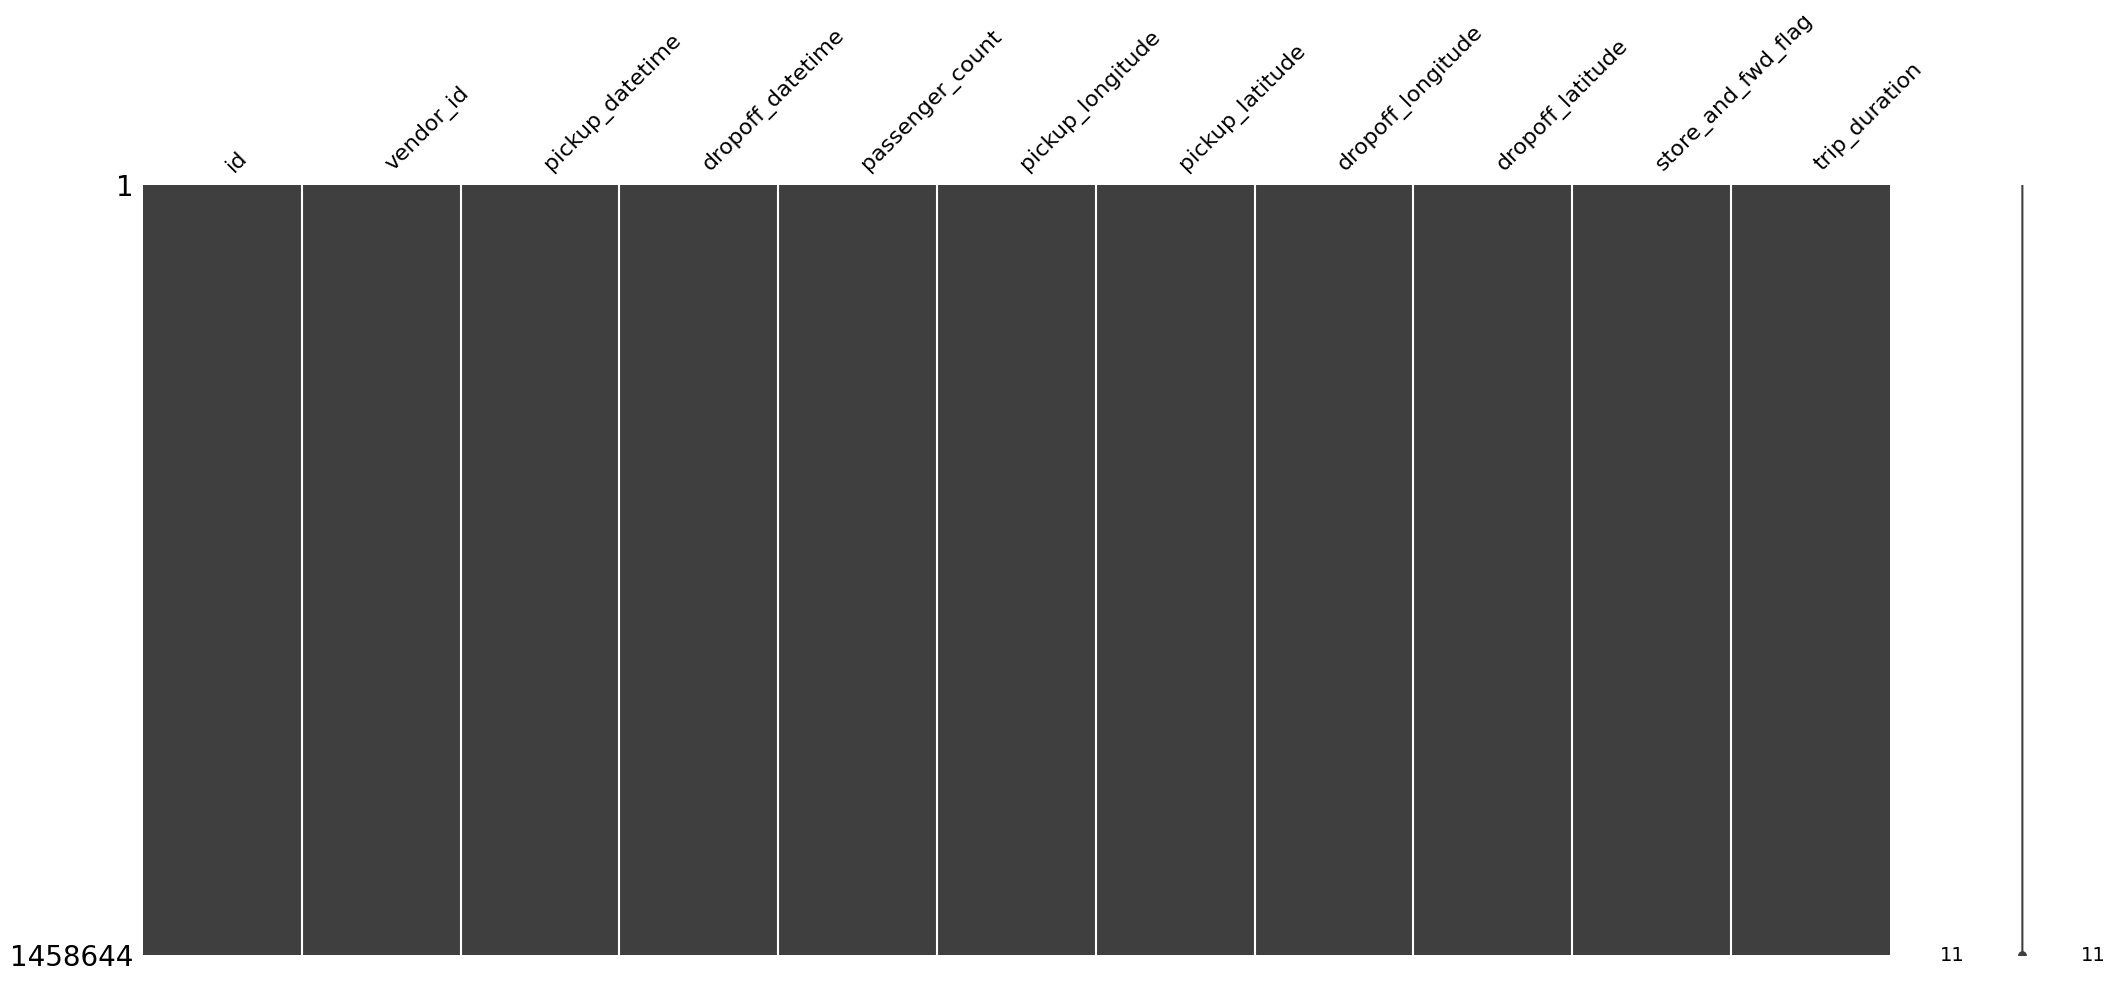

In [9]:
# Visualizing the missing values
plt.figure(figsize=(20,20))
msno.matrix(nyc_data)

From the above matix plot visualization we can see that there is no missing values in NYC Data And Also there is no duplicate value present from the 1458644 attributes.

### What did you know about your dataset?

**First, lets define what information the columns contains using inspection**   

The NYC dataset consist of 148644 rows and 11 features in it.

**(i)id -**  A unique identifier for each trip.

**(ii)vendore_id -** A code indicating the provider associated with the trip record.  

**(iii)pickup_datetime -** Date and time when the meter was engaged.   

**(iv)dropoff_datetime -** Date and time when the meter was disengaged.  

**(v)passenger_count -** The number of passengers in the vehicle. (driver entered value)

**(vi)pickup_latitude -** The latitude where the meter was engaged.      
**(vii)dropoff_longitude -** The longitude where the meter was disengaged.

**(viii)dropoff_latitude -** The latitude where the meter was disengaged.        

**(ix)store_and_fwd_flag -** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server -       
Y=store and forward       
N=not a store and forward trip        

**(x)trip_duration -** duration of the trip in seconds.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
nyc_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [11]:
# Dataset Describe
nyc_data.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

Answer Here-From the above analysis we can see that only these 7 columns are numericals and other are categorical. In which passenger_count columns varies from 0-9 and trip_duration maximum value is 3526282 seconds approx 979.5 hours and minimun value is 1 second, which shows outilier present in these feature.

<Axes: >

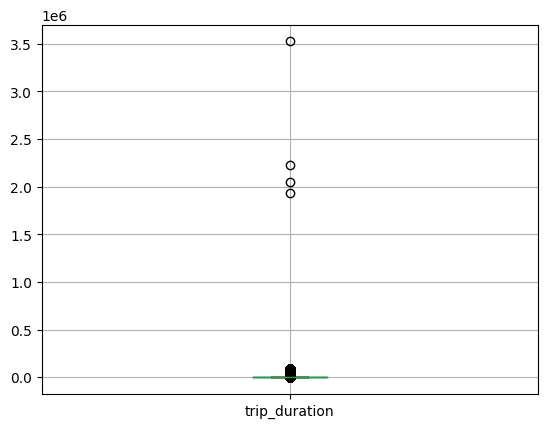

In [12]:
#Outlier Check with respect to trip_duration column
nyc_data.boxplot(column=['trip_duration'])

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
nyc_data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

In [15]:
print(nyc_data.isnull().sum())
print('\n')
print(f'Duplicate value count-{nyc_data.duplicated().sum()}')

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Duplicate value count-0


### 3.1 Timestamp Conversion

In [16]:
#Formate check
nyc_data['pickup_datetime'][0]

'2016-03-14 17:24:55'

In [17]:
#Convert timestamp to datetime formate to fetch the other details
nyc_data['pickup_datetime']=pd.to_datetime(nyc_data['pickup_datetime'])
nyc_data['dropoff_datetime']=pd.to_datetime(nyc_data['dropoff_datetime'])
nyc_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [18]:
#Extracting days from the pickup_datetime and dropoff_datetime
nyc_data['pickup_day']=nyc_data['pickup_datetime'].dt.day_name()
nyc_data['dropoff_day']=nyc_data['dropoff_datetime'].dt.day_name()

In [19]:
#Also Extracting month from the pickup_datetime and dropoff_datetime
nyc_data['pickup_month']=pd.DatetimeIndex(nyc_data['pickup_datetime']).month
nyc_data['dropoff_month']=pd.DatetimeIndex(nyc_data['pickup_datetime']).month

In [20]:
#And now extracting time from the pick_datetime and dropoff_datetime
nyc_data['pickup_hour']=nyc_data['pickup_datetime'].dt.hour
nyc_data['dropoff_hour']=nyc_data['dropoff_datetime'].dt.hour

In [21]:
#View of data
nyc_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,13


In [22]:
#Checking dtypes of the features
nyc_data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_month                   int64
dropoff_month                  int64
pickup_hour                    int64
dropoff_hour                   int64
dtype: object

In [23]:
nyc_data['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [24]:
nyc_data['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

### What all manipulations have you done and insights you found?

* As per the analysis we can say that data does not contains any missing value and duplicate value in it.

* Columns pickup_datetime and dropoff_datetime available in string, so we had converted it into numerical values because we cannot generate any aspect from it.

* From timestamp columns manipulate two columns that are pickup_day and dropoff_day for data visualization in proper way.

* And from pickup_day and dropoff_day we can see that Friday has highest number of value counts, which indicates that majority of travelling more due to weekends.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**4.1 Univariate Analysis**

#### Chart - 1

###**Analysis of passenger count column**


In [25]:
#passenger_count column value counts
nyc_data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Dist of passenger count')

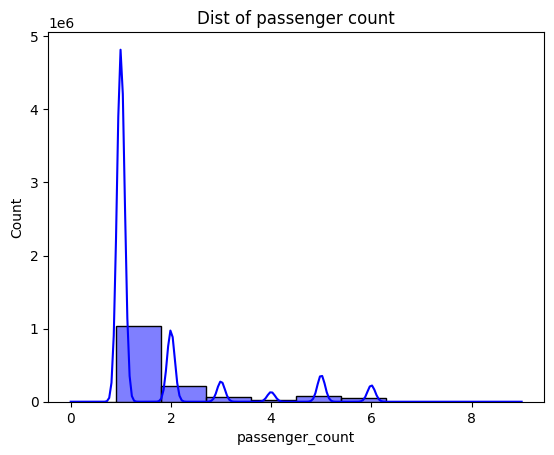

In [26]:
# Chart - 1 visualization code
ax=sns.histplot(x=nyc_data['passenger_count'],data=nyc_data,kde=True,bins=10,color='blue')
plt.title('Dist of passenger count')

##### 1. Why did you pick the specific chart?

Using hist plot we can easily understand about column using bars which provides counts of passenger in perticular trip.

##### 2. What is/are the insight(s) found from the chart?

From this analysis we can see that most number of passenger travel alone, approx more than 10 lakhs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that more than 10lakhs passenger travel alone which may somehow increase the bookings but more the taxi cars in market cause traffic as well polution.

#### Chart - 2

###**Visualization of pickup days and dropoff days**

Text(0.5, 1.0, 'Dropoffs as per week days')

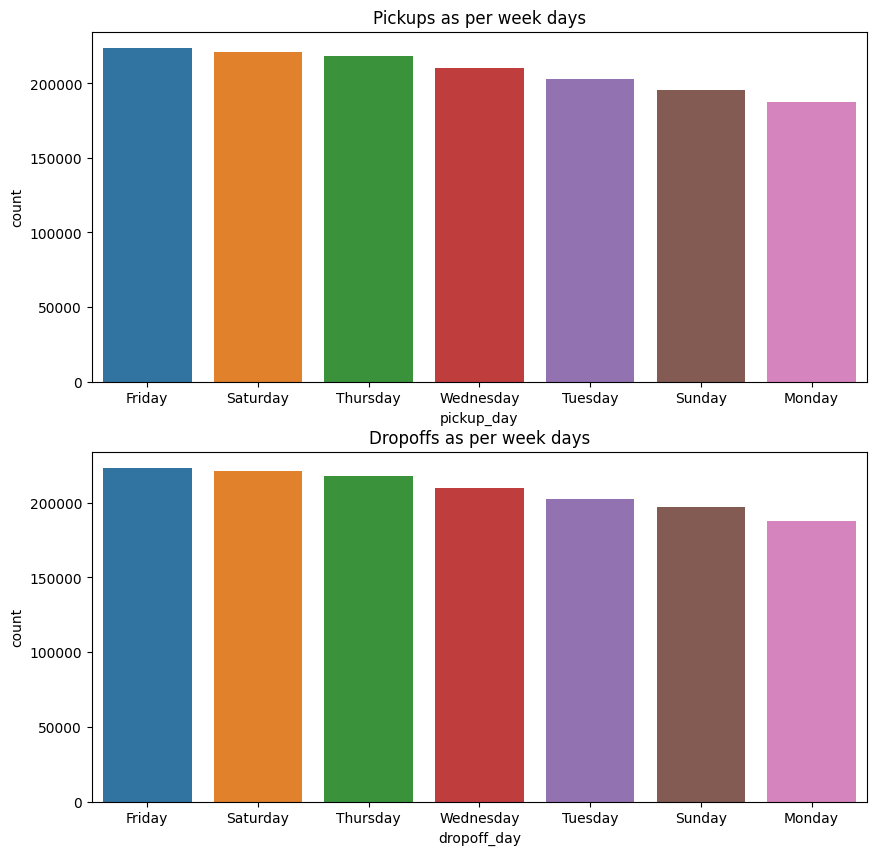

In [27]:
# Chart - 2 visualization code
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=nyc_data,ax=ax[0],order=nyc_data['pickup_day'].value_counts().index)
ax[0].set_title('Pickups as per week days')

sns.countplot(x='dropoff_day',data=nyc_data,ax=ax[1],order=nyc_data['dropoff_day'].value_counts().index)
ax[1].set_title('Dropoffs as per week days')

##### 1. Why did you pick the specific chart?

Distribution of week days very-well explained through bars through which we can see total overview with these.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we can say that friday have majority and monday has least number of travelling in dropoffs as well as pickups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As per the analysis, due to weekends people loved to travel out on friday for food,picnics,movies,etc. And in busy or workday like monday and others has lesser trips.

#### Chart - 3

###**Analysis of vendor ID**

In [28]:
#vendor_id column
nyc_data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [29]:
#percentage of trip by venderID
percentage_vender1=round(len(nyc_data[nyc_data['vendor_id']==1])/len(nyc_data)*100,1)
percentage_vender2=round(len(nyc_data[nyc_data['vendor_id']==2])/len(nyc_data)*100,1)
total_percentage=[percentage_vender1,percentage_vender2]
total_percentage

[46.5, 53.5]

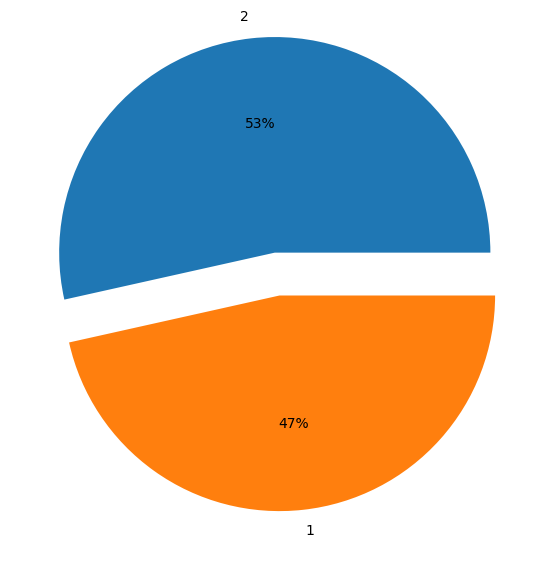

In [30]:
# Chart - 3 visualization code
fig,ax=plt.subplots(1,1,figsize=(12,7))
ax.pie(x=nyc_data['vendor_id'].value_counts(),labels=nyc_data['vendor_id'].value_counts().index,explode=[0.2,0],autopct='%1.0f%%')

plt.show()

##### 1. Why did you pick the specific chart?

Vendor ID contains categorical values in it so, pie chart is a appropriate way to understand them.

##### 2. What is/are the insight(s) found from the chart?

Vendor ID (=2) has highest number of bookings approx 54%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Both have close ratio to 50% and has equal weightage to growth perspective.

#### Chart - 4

###**Analysis of store and forward flag**

In [31]:
#Store and forword flag
nyc_data['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

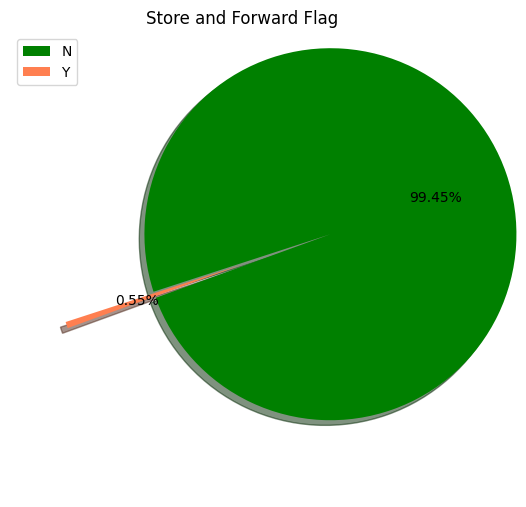

In [32]:
# Chart - 4 visualization code
plt.figure(figsize=(6,8))
plt.pie(nyc_data['store_and_fwd_flag'].value_counts(),colors=['green','coral'],shadow=True,explode=[0.5,0],autopct='%1.2f%%',startangle=200)
plt.legend(labels=['N','Y'])
plt.title('Store and Forward Flag')

##### 1. Why did you pick the specific chart?

store and forword flag is categorical value, which can be beautifully visualize and analized by pie plot.

##### 2. What is/are the insight(s) found from the chart?

We can see that less than 1% of trip that were store and forword.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of data is not store and forword trips that may cause negative impect as that trip records not allocating the vehicle server.

#### Chart - 5

###**Analysis of Trip Duration**

In [33]:
# 10 largest value of trip duration
print(nyc_data['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

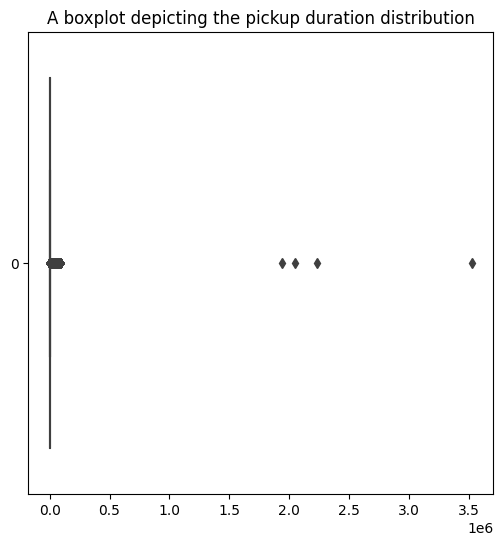

In [34]:
# Chart - 5 visualization code
plt.figure(figsize=(6,6))
sns.boxplot(nyc_data['trip_duration'],orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

##### 1. Why did you pick the specific chart?

Boxplot uses boxes and lines to depict the distribution of groups in numerical data and otherthan it gives good visualization of outlier.

##### 2. What is/are the insight(s) found from the chart?

Thus we see there is least number values are in between 2000000-3500000 while all others are somewhere between 0 and 100000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analysis says that near 2000000 to 3500000 is definitely an outlier which may impact the bussiness aspect so, we have to treat it.

#### Chart - 6

###**Visualization Of Pickup and Dropoff longitude**

In [35]:
nyc_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour'],
      dtype='object')

Text(0.5, 1.0, 'The Distribution Of Dropoff Latitude')

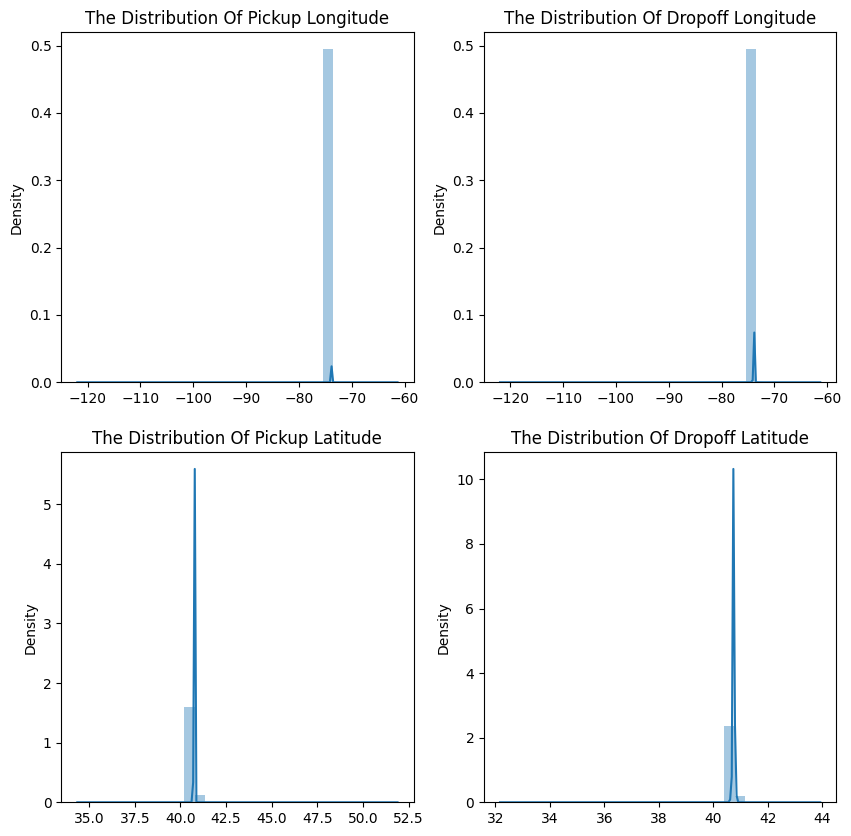

In [36]:
# Chart - 6 visualization code
figure,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))

sns.distplot(x=nyc_data['pickup_longitude'],ax=ax[0,0],kde=True,bins=30)
ax[0,0].set_title('The Distribution Of Pickup Longitude')

sns.distplot(x=nyc_data['dropoff_longitude'],ax=ax[0,1],kde=True,bins=30)
ax[0,1].set_title('The Distribution Of Dropoff Longitude')

sns.distplot(x=nyc_data['pickup_latitude'],ax=ax[1,0],kde=True,bins=30)
ax[1,0].set_title('The Distribution Of Pickup Latitude')

sns.distplot(x=nyc_data['dropoff_latitude'],ax=ax[1,1],kde=True,bins=30)
ax[1,1].set_title('The Distribution Of Dropoff Latitude')

##### 1. Why did you pick the specific chart?

All these columns are numericals so, distplot is a classical approach to visualize the distribution.

##### 2. What is/are the insight(s) found from the chart?

Charts shows that the pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup lattitude and the dropoff latitude has slightly different distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Latitude and logitude help to find the location where the taxi cap gets more and more trips, which leads to make profit without any further delay.

#### Chart - 7

###**Analysis Of Montly Trips**

In [37]:
nyc_data['pickup_month'].value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_month, dtype: int64

Text(0.5, 1.0, 'Overall Montly Trips')

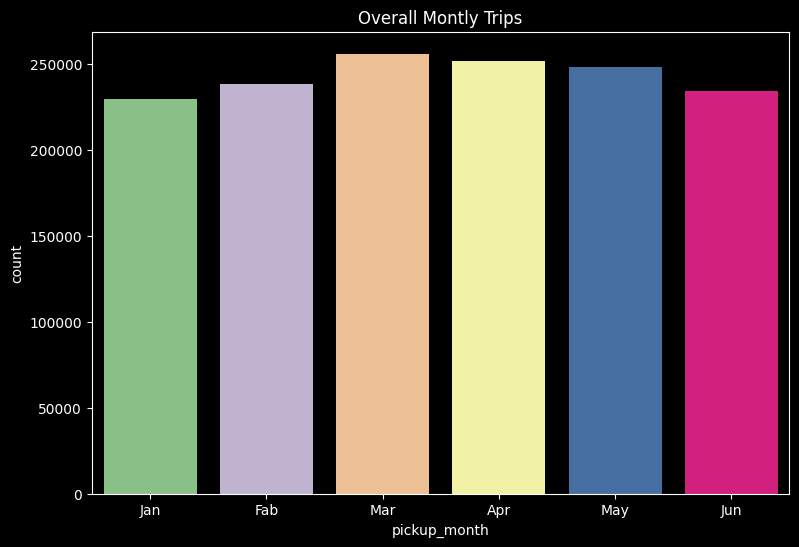

In [38]:
# Chart - 7 visualization code

plt.style.use('dark_background')
plt.figure(figsize=(9,6))
sns.countplot(x='pickup_month',data=nyc_data,palette='Accent')
plt.xticks([0,1,2,3,4,5],labels=['Jan','Fab','Mar','Apr','May','Jun'])
plt.title('Overall Montly Trips')

##### 1. Why did you pick the specific chart?

Count plot displays the count of categorical observation in each bin of dataset that provides proper and understable visuazations.

##### 2. What is/are the insight(s) found from the chart?

Data available between january to june month only and in march maximun
trips are done , although all the six have good amount trip booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Only six month data is available we cannot justify remaining month data that how the trips gets fluctuate. Although from january to june has good amount bookings.

#### Chart - 8

###**Visualization Of Pickup and Dropoff Hour**

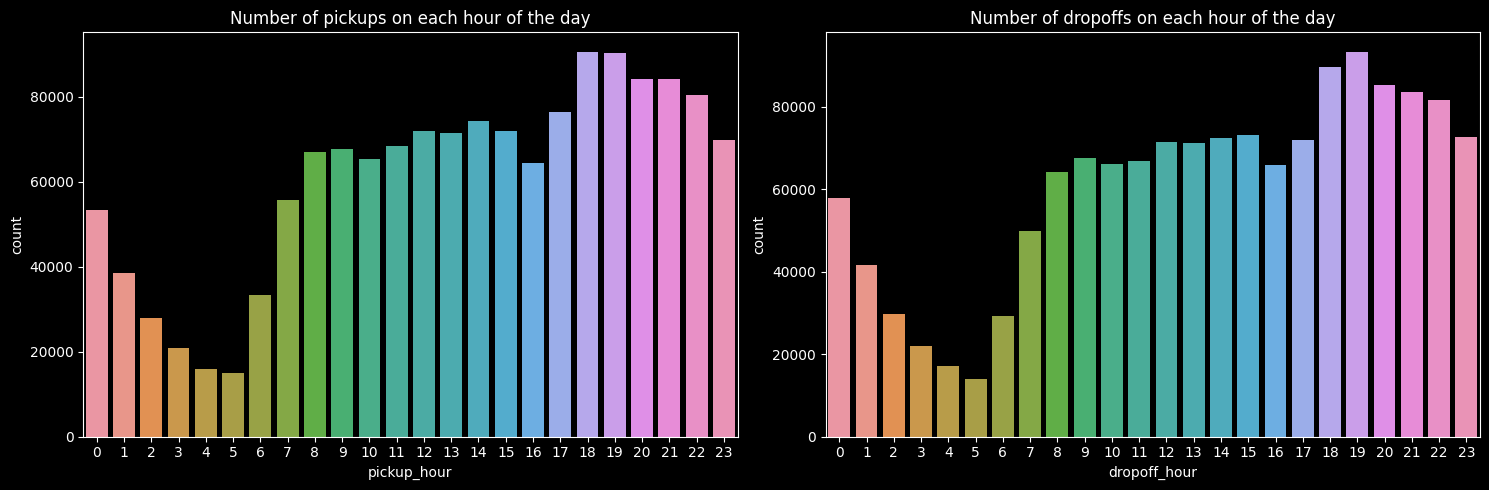

In [39]:
# Chart - 8 visualization code
plt.style.use('dark_background')
figure,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='pickup_hour',data=nyc_data,ax=ax[0])
ax[0].set_title('Number of pickups on each hour of the day')

sns.countplot(x='dropoff_hour',data=nyc_data,ax=ax[1])
ax[1].set_title('Number of dropoffs on each hour of the day')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

This is used to represent the occurance(count) of the observation and it gives visualization like bar and histogram so we can easily make group or cluster using it.

##### 2. What is/are the insight(s) found from the chart?

Both pickup_hour and dropoff_hour follows the same path and busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

At evening travelling rush is more so, it may take some time to visit destination but for less distance with more money due to rush.

#**4.2 Bivariate And Multivariate Analysis**

#### Chart - 9

###**Analysis Between Independent(x-variables)   Vs   Dependent(y-variable)**

In [40]:
#Creating numeric column separate
numeric_features=nyc_data.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour'],
      dtype='object')

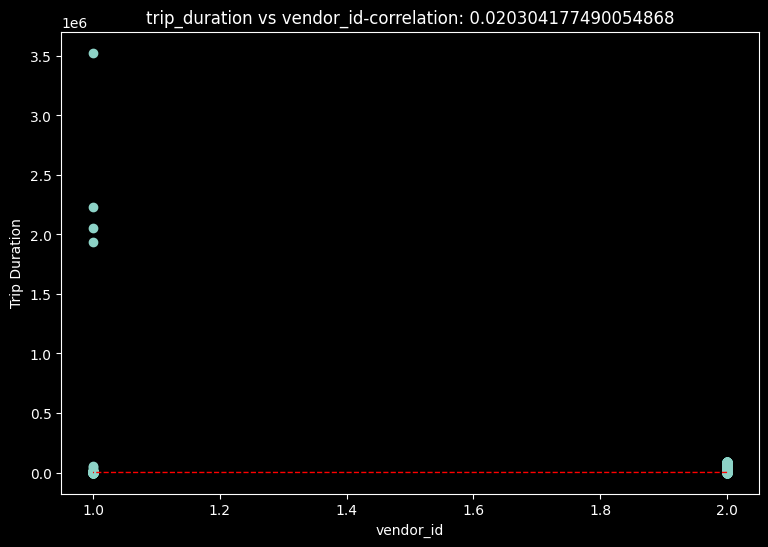

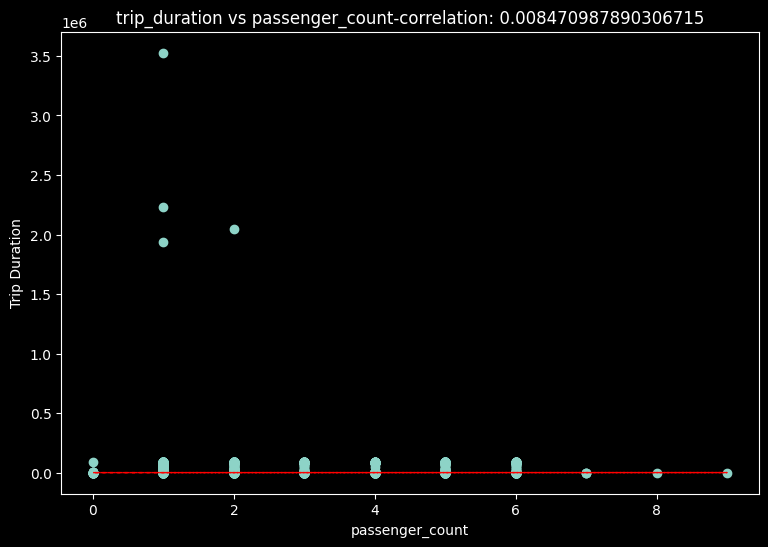

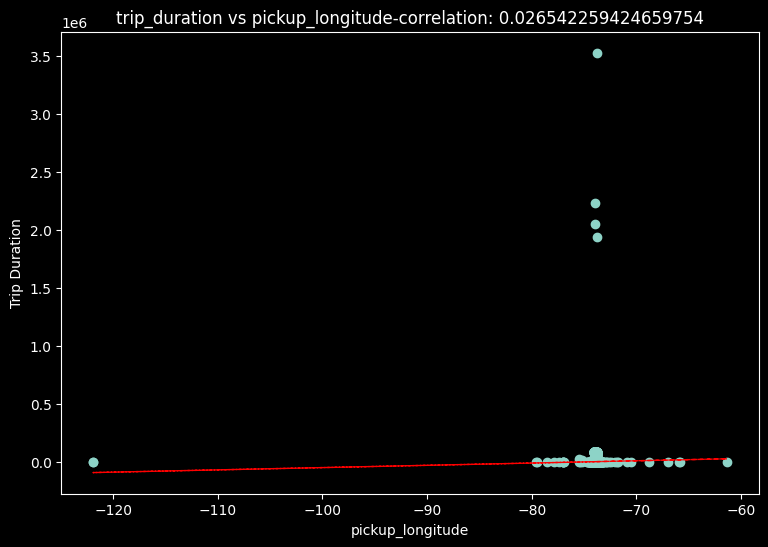

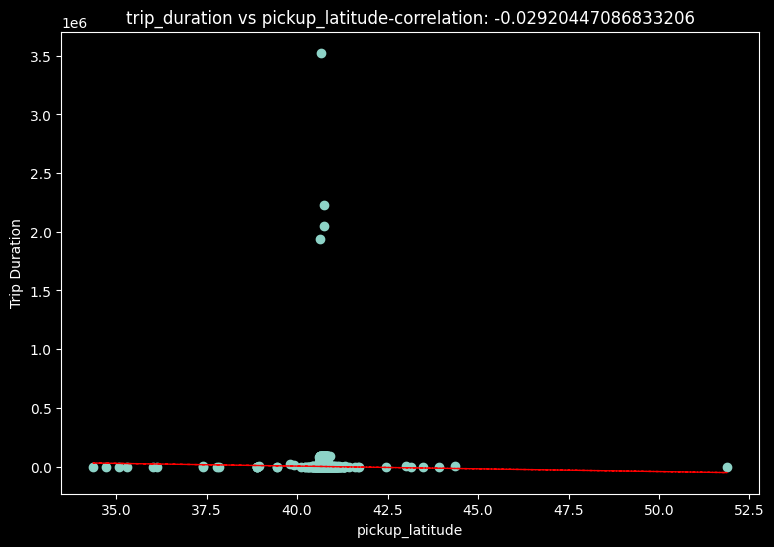

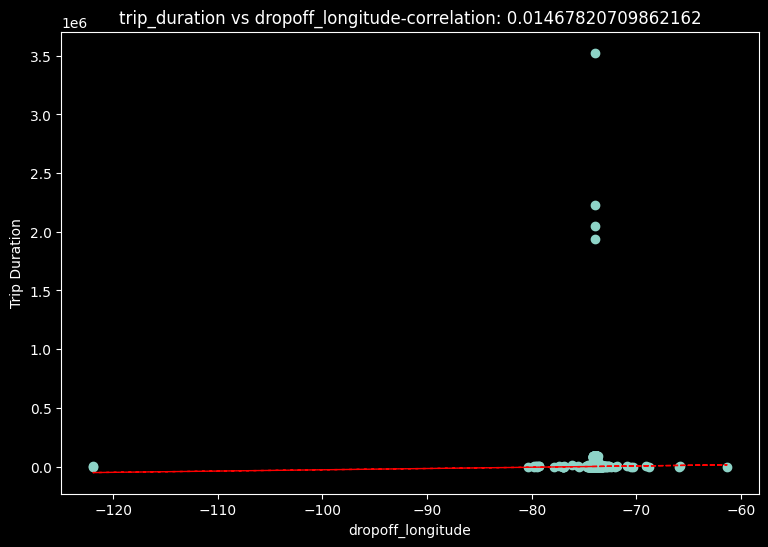

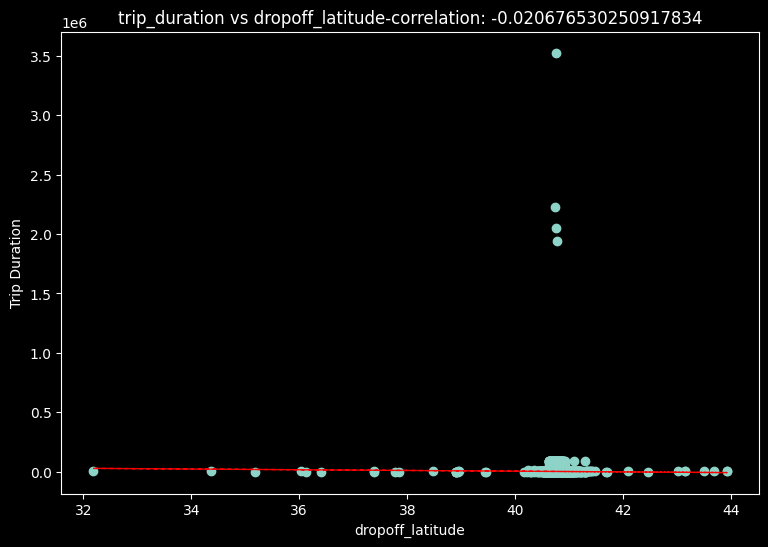

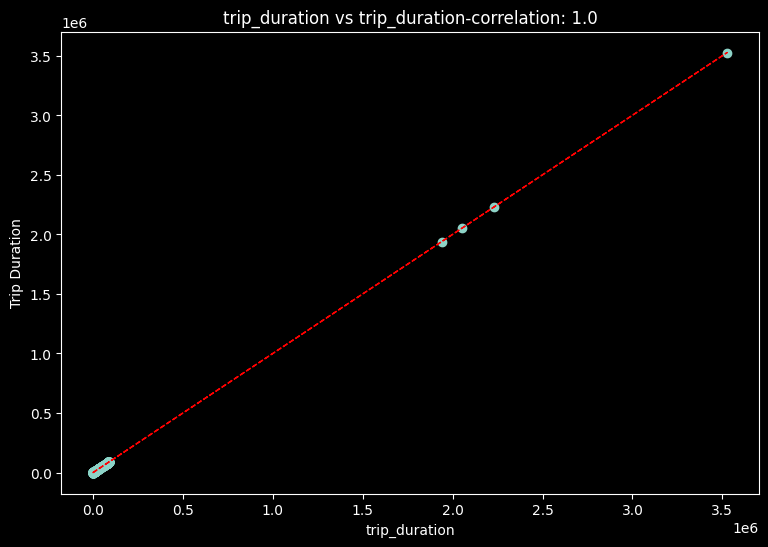

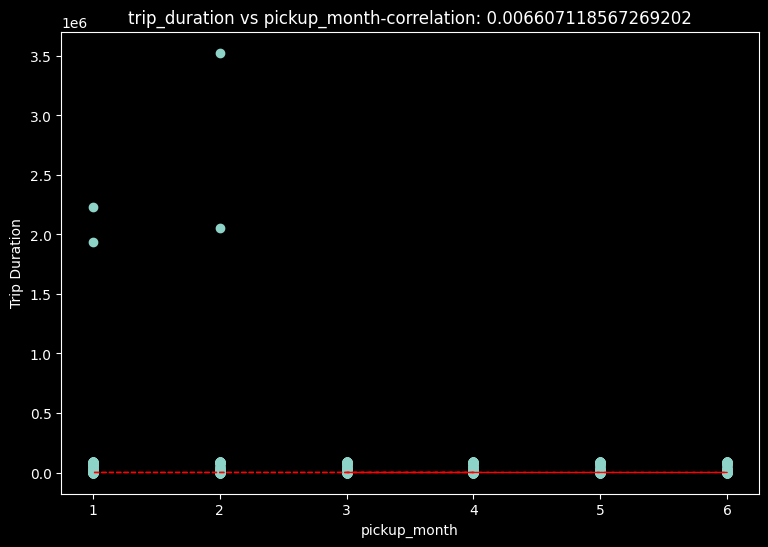

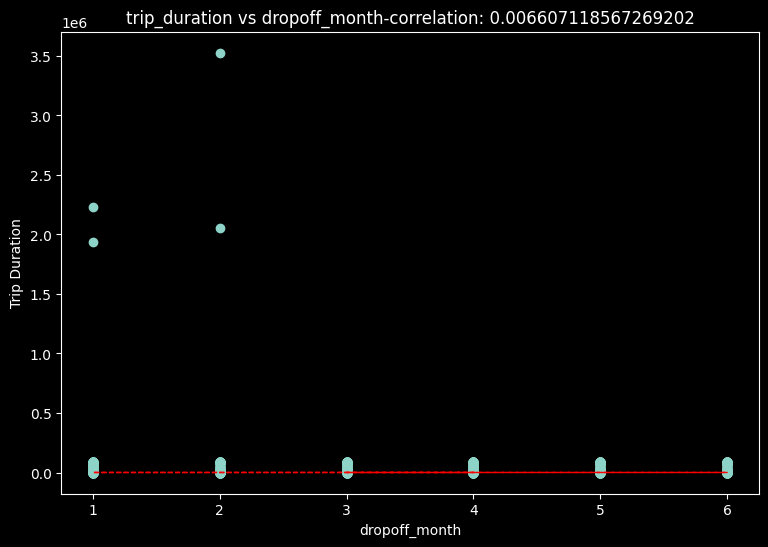

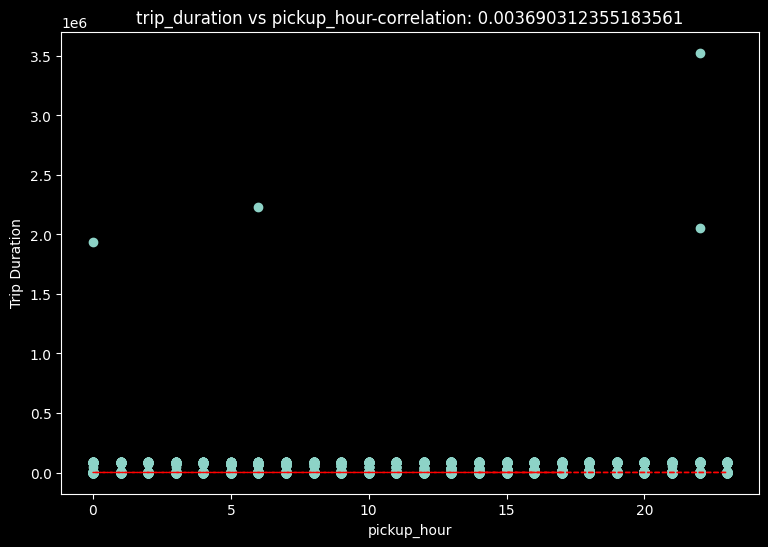

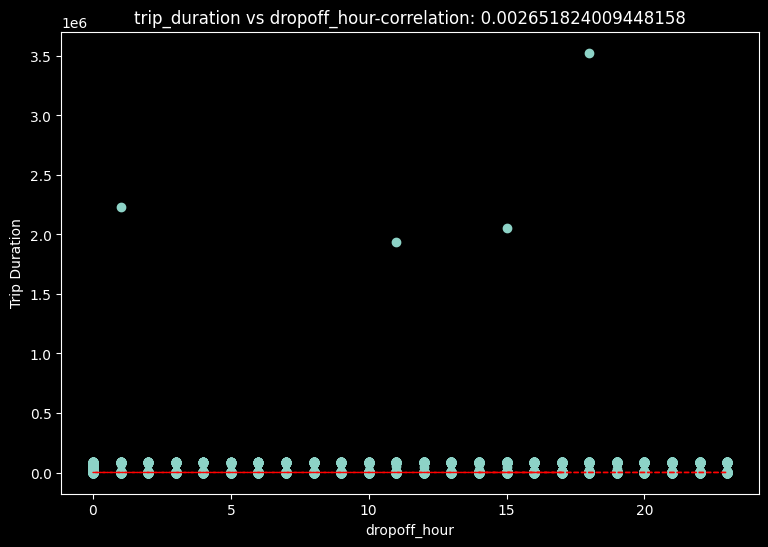

In [41]:
# Chart - 9 visualization code
for col in numeric_features:
  '''
  checking correlation between x and y variable
  '''
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=nyc_data[col]
  label=nyc_data['trip_duration']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Trip Duration')
  ax.set_title('trip_duration vs '+col+'-correlation: '+str(correlation))
  z=np.polyfit(nyc_data[col],nyc_data['trip_duration'],1)
  y_hat=np.poly1d(z)(nyc_data[col])

  plt.plot(nyc_data[col],y_hat,'r--',lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

Using polyfit which find the coeffients of a polynimial of degree plotting scatter plot between two variables (x and y) along two axes. Scatter plot briefly represents data in a graphical form.

##### 2. What is/are the insight(s) found from the chart?

As per the analysis two variable does not contains any linear relationalship or not normally distribution across x and y axis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Variables to y variable are not highly corelated to other. While model building these feature helps a lot without dropping.

#### Chart - 10

###**Analysis Of Passenger Count And Vendor Id**


In [42]:
#Finding the values of passenger count with respect to vendor id
values=nyc_data.groupby(by='vendor_id')['passenger_count'].sum()
values

vendor_id
1     854305
2    1573651
Name: passenger_count, dtype: int64

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

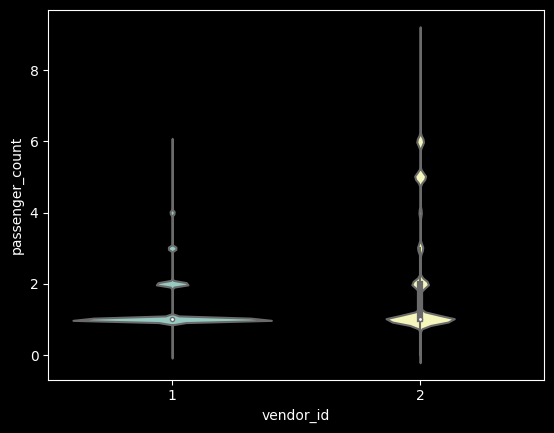

In [43]:
# Chart - 10 visualization code
sns.violinplot(y=nyc_data['passenger_count'],x=nyc_data['vendor_id'])

##### 1. Why did you pick the specific chart?

Passenger count is the numerical column we can easily understand the spread of the data from violin plot.

##### 2. What is/are the insight(s) found from the chart?

From the analysis we can see that vendor_id(2) has more number of passenger upto (<=6) and vendor_id(1) carries less number passenger upto (<=4). In both maximum number of trips are in between (1 to 3) passenger.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the taxi driver looking for the more number passenger, so the focus will be at vendor_id(2) can provide more trip duration as well as more money.

#### Chart - 11

### **Visualization Of Distance**

In [44]:
#Creating duration time column for the better analysis
bins=np.array([0,1800,3600,5400,7200,90000])
nyc_data['duration_time']=pd.cut(nyc_data.trip_duration,bins,labels=["<5","5-10","10-15","15-20",">20"])


Text(0.5, 1.0, 'A compared distributionof trips >5 hours')

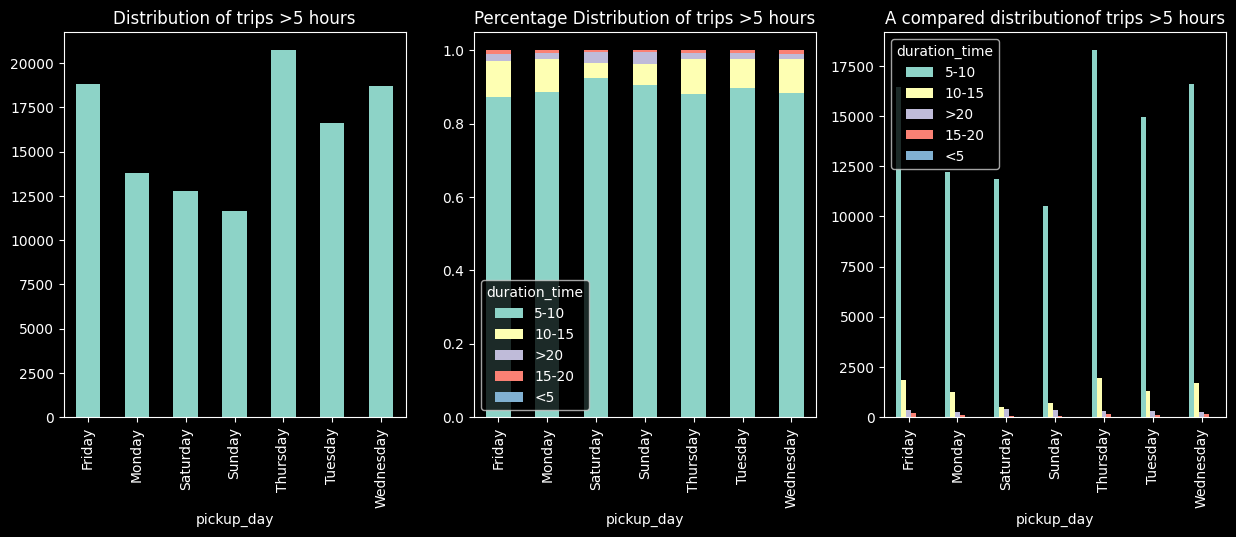

In [45]:
# Chart - 11 visualization code
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))

ax1=nyc_data[(nyc_data.duration_time != "<5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips >5 hours')

ax2=nyc_data[(nyc_data.duration_time != "<5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar',stacked='True',ax=ax[1])
ax[1].set_title("Percentage Distribution of trips >5 hours")

ax3=nyc_data[(nyc_data.duration_time != "<5")].groupby('pickup_day')['duration_time'].value_counts(normalize=False).unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distributionof trips >5 hours')

##### 1. Why did you pick the specific chart?

Bar plots are driven beautifully for categorical as well as numericals values as shown in chart representation.  

**Chart Descriptions ▶**   
    
✈ The left most graph shows a frequency distribution of the number of trips (>5 hours) taken on each day of the week.    

✈ The middle one shows a percentage distribution of the trips of different duration (>5 hours) within each day of the week.  
    
✈ The right one shows the frequency distribution of the trips of different duration (>5 hours) within each day of the week


##### 2. What is/are the insight(s) found from the chart?

✈ The most number trips which lasts >5 hours were taken on Thursday followed by Friday and Wednesday.(Left graph)         

✈ The most number of trips of duration 5-10,10-15 was taken on Thursday.(Right graph)        

✈ But the highest percentage of trips longer than 20 hours was taken on Sunday and Saturday.(Middle graph)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above analysis we can understand most of the trips with higher duration is on weekands that can give positive impact as per bussiness aspects.

#### Chart - 12

In [46]:
#defining a function to take coordinates as inputs and return us distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  '''
  returns distance in km
  '''
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

In [47]:
#Creating distance column in dataset
nyc_data['distance']=nyc_data.apply(lambda x:cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

###**Analysis Of Distance**

####**◀ Distance per passenger count ▶**

Text(0.5, 1.0, 'Distance Vs Passenger count')

<Figure size 600x800 with 0 Axes>

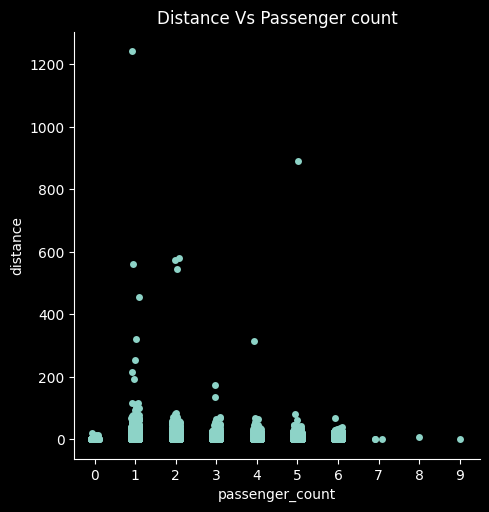

In [48]:
# Chart - 12 visualization code
plt.figure(figsize=(6,8))
sns.catplot(y='distance',x='passenger_count',data=nyc_data,kind='strip')
#sns.swarmplot(y=nyc_data['distance'],x=nyc_data['passenger_count'])
plt.title('Distance Vs Passenger count')

####**◀ Distance per hour of day ▶**

Text(0.5, 1.0, 'Distance Vs Pickup hour')

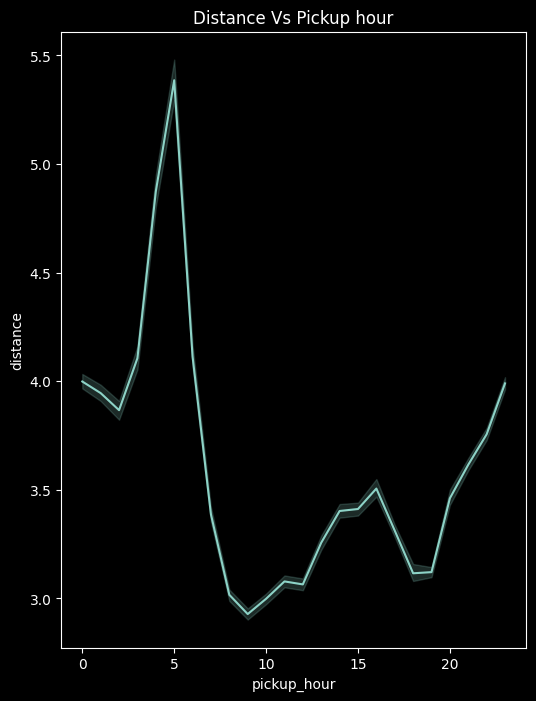

In [49]:
plt.figure(figsize=(6,8))
sns.lineplot(x='pickup_hour',y='distance',data=nyc_data)
plt.title('Distance Vs Pickup hour')

####**◀ Distance Per Month ▶**

Text(0.5, 1.0, 'Distance Vs Pickup month')

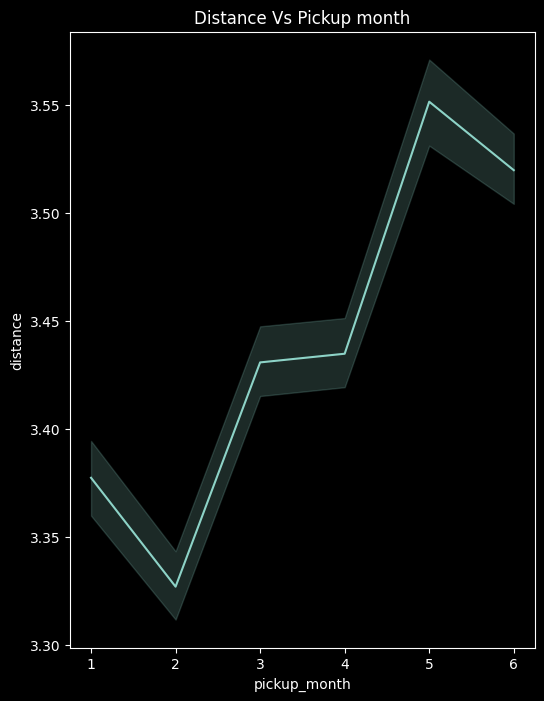

In [50]:
plt.figure(figsize=(6,8))
sns.lineplot(x='pickup_month',y='distance',data=nyc_data)
plt.title("Distance Vs Pickup month")

####**◀ Trip Duration and Distance ▶**

Text(0.5, 1.0, 'Distance Vs Trip duration')

<Figure size 600x800 with 0 Axes>

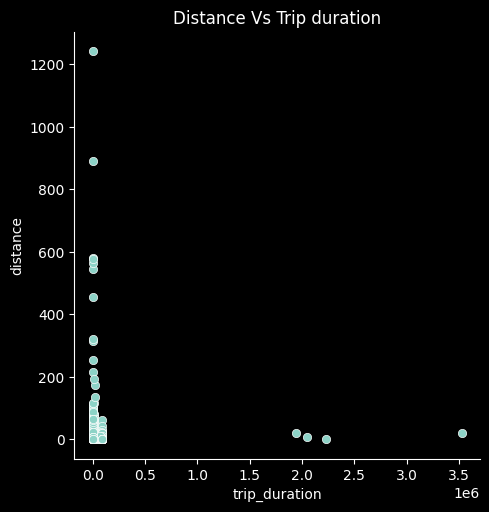

In [51]:
plt.figure(figsize=(6,8))
sns.relplot(y=nyc_data.distance,x='trip_duration',data=nyc_data)
plt.title('Distance Vs Trip duration')

##### 1. Why did you pick the specific chart?

Catplot is used to plot categorical and numerical variable whereas line plot visualize information as a series of data points called makers connected by straight line segments. And relplots refers to relationship plot, replot takes some of the same argument as scatterplot.             
Graphs visually illustrate ralationship between them.

##### 2. What is/are the insight(s) found from the chart?

**Graph-1**      
✈ Longer distance covered by 1 or 2 or 5 passenger rides.     

**Graph-2**       
✈ Trip distance is highest during early morning hours.                 
✈ It is fairly equal from morning till the eveing varying around 3-3.5 kms.        
✈It start increasing gradually towards the late night hours starting from evening till 5 AM and decrease speedly towords morning.        

**Graph-3**           
✈ As per trip distance per month, trip distance is the lowest in February and the maximum in may

**Graph-4**           
✈ There are trips which trip duration as short as 0 seconds and yet covering a large distance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [52]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [53]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [54]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [59]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [60]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [61]:
# Expand Contraction

#### 2. Lower Casing

In [62]:
# Lower Casing

#### 3. Removing Punctuations

In [63]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [64]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [65]:
# Remove Stopwords

In [66]:
# Remove White spaces

#### 6. Rephrase Text

In [67]:
# Rephrase Text

#### 7. Tokenization

In [68]:
# Tokenization

#### 8. Text Normalization

In [69]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [70]:
# POS Taging

#### 10. Text Vectorization

In [71]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [72]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [73]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [74]:
# Transform Your data

### 6. Data Scaling

In [75]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [76]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [77]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [78]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [79]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [84]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [87]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [88]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***